# Analyzing Sleep Patterns Across Different Age Groups

**Heidi Eren**
*eren.h@northeastern.edu*

**DS 2001: Health Programming Practicum - Spring 2022**

Source: The data used in this project is from the National Sleep Foundation (2011) and the Stanford Technology Analytics and Genomics in Sleep (2019) and was accessed on 30th of March 2022 from the links below. 

https://www.sleepfoundation.org/professionals/sleep-americar-polls/2011-poll-technology-and-sleep

https://sleepdata.org/datasets/stages


**Abstract**

Sleep is an important aspect of our everyday lives. It is essential for all, especially adolescents, where a variety of vital life processes occur. However, with recent technological advancements, our sleep patterns may have drastically changed in response to the increased exposure of devices. To examine these changes, this project aimed to convey the trends in sleep patterns for different age groups across a decade. It could also reveal whether recent technology has impacted the sleep quality of younger generations. Results indicate that the different age groups are equally prone to the disruptions toward their circadian rhythms. Observing the patterns through correlational analysis, adolescents and adults alike can benefit from learning the effects of electronic devices and screens prior to bed and better enhance sleep conditions for the long term.

**Background** 

While sleep affects a variety of brain functions, it is also influenced by a variety of internal and external conditions. From memory consolidation, homeostasis, and immunity, studies have shown that sleep helps with brain development [5]. However, this depends on the sleep quality and quantity based on biological, environmental, and societal factors. Through the normal sleep-wake cycle, two brain processes—homeostatic drive (the need for sleep) and circadian rhythm (sleep-wake rhythm)—shape the sleep patterns people exhibit on a daily basis. The body’s sleep regulation affects physical exhaustion and subsequent sleep patterns. 

Environmental factors such as light and technology can have adverse implications on sleep by suppressing melatonin. With the advent of new technology in the twenty-first century, technological devices have become the gateway to connectivity and communication across the world among adolescences. Its popularity and accessibility make it easy and convenient for the newer, tech-savvy generation to utilize, integrating it into their daily tasks from morning to night. Especially as it is widely used and accessible in the home environment, it has become very common for adolescents to use technology before bed, despite the health implications it can have. According to a 2014 study, 76% of adolescents reported using a cell phone prior to bed [3]. This number will continue to rise as more enhanced technologies and interactive devices reach the market.

Numerous studies have demonstrated the effects that technology use can have on sleep patterns. Often times, adolescents have reported “shorter sleep duration, increased daytime sleepiness, worse academic performances” [5] after using their electronic devices the night before. These effects can have further implications, as insufficient sleep has been associated with decreased productivity, energy, and academic performance [4] and sometimes diabetes and cardiovascular problems [2]. As a result, more people are relying on naps and coffee, disrupting their circadian rhythm. Prolonged exposure to blue light from electronic screens significantly “suppresses the secretion of melatonin” [1] as well. While these health concerns have been analyzed and linked to sleep patterns in previous studies, it is important to consider *newer* forms of technology use and its effects on sleep among different age groups, especially since technology has continued to change over the last decade.

**Data**

The data includes survey data conducted through the National Sleep Foundation in 2011. With 1,508 surveys conducted, of which 750 are telephone interviews and 758 are web surveys, the Questionnaire asks specific details regarding sleep habits and technology use among respondents ages 13-64. Some questions include the specific times they wake up and go to sleep on the weekday and weekend, number of naps per day and its duration, caffeination daily consumption, assessing sleep patterns as “adequate” or “inadequate”, and cell phone or laptop usage one hour before bed. The dataset is extensive and thorough especially with the large number of respondents’ information to analyze from. The NSF data collection was intended to assess the variety of ways technology disrupts sleep.

The Stanford Technology Analytics and Genomics in Sleep (STAGES) compiled an extensive data collection by 2019 with 1,500 adults and adolescent patients from six medical centers across the US. The database includes an online sleep symptoms questionnaire called the Alliance Sleep Questionnaire that assesses different forms of sleep quality and quantity as well as medical history questions. Examples of the questions include self-reported chances of dozing, tiredness, muscle weakness, sleep disruptions and difficulties such as nightmares, bed times on the weekday versus weekend, and last use of technology before bed. The STAGES dataset was intended to examine behavior and lifestyle conditions that medical devices and treatment cannot determine.

Each of these datasets proves to be valuable in assessing the sleep patterns and conditions of people at different time periods. By comparing the trends between the responses, my project could analyze the ways in which our sleep patterns have changed over time, possibly due to the greater exposure of technology.

More specifically, my project aims to address the following questions:

**What is the relationship between age and the likelihood of dozing off in everyday activities?** This is known as the Epworth Sleepiness Scale based on an 8-item questionnaire that ranks the likelihood of dozing off, where each item scales from 0--no chance of dozing off to 3--high chance of dozing off. 

**What is the relationship between age and the amount of sleep obtained per week night?** The sleep duration is self-reported and assesses the total amount of sleep on work/school nights.

**What is the relationship between age and the disrupted sleep duration on a week night?** The sleep disruption is self-reported and assesses the total amount of time awake (awoken from sleep) on work/school nights. 

The age groups are organized by generation:

Gen Z: 13-18 year olds

Gen Y: 19-29 year olds

Gen X: 30-45 year olds

Baby Boomers: 46-64 year olds

*Note that the youngest generation (Gen Alpha: <12 year olds) will not be classified as an age group since they were not born (or were just born) for the NSF survey and too young to be able to participate in the STAGES survey.*

**Importing Libraries and Reading Data**

The required libraries were imported and the files were read accordingly. 

In [42]:
#import packages 
import csv
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#load data
STAGES_FILE = "stages_data.csv"
POLL_FILE = "national_sleep_foundation_poll.csv"

In [44]:
#read data
def read_csv(filename):
    ''' Function: read_csv
        parameter: filename, a string
        Returns: 2d list of strings, the contents of the file
    '''
    data = []
    with open(filename, "r") as infile:
        csvfile = csv.reader(infile, delimiter = ",")
        for row in csvfile:
                data.append(row)
    data = data[1:]
    
    return data

**Data Cleaning and Organizing**

Because of the voluntary nature of surveys, some respondants chose "don't know" or "refused to answer" or simply left their responses blank for the questions. To ensure that this data was excluded from the analysis, the data was cleaned and appended to a new list of lists. 

In [45]:
#clean data for 2011 poll dataset
def cleaned_poll(all_data, index):
    ''' Function: complete_data
        Parameter: 2d list of strings (the contents of the file) and index (int) for y_variable column position
        Return: a new list of strings, excluding empty strings and "refused" or "don't know" responses
    '''
    no_response = ["96, ""98", "99", "998", "999"]
    
    complete_data = []
    for row in all_data:
        if row[index] != " " and row[index] not in no_response:
            complete_data.append(row)
            
    return complete_data

In [46]:
#clean data for stages dataset
def cleaned(all_data, index):
    ''' Function: complete_data
        Parameter: 2d list of strings (the contents of the file) and index (int) for y_variable column position
        Return: a new list of strings, excluding empty strings
    '''
    
    complete_data = []
    for row in all_data:
        if row[index] != " ":
            complete_data.append(row)
            
    return complete_data

**Functions**

The following functions organize the lists of data into lists that only contain the two variables that will be compared. The average of each age group was calculated based on the lists only containing data from that specific age group.

In [47]:
# isolate the ages column and y_variable column from the dataset
def get_simple_data(some_data, age_index, score_index):
    ''' Function: get_simple_data
        Parameter: some_data, 2 integers (for column positions)
        Returns: 1 new list that only includes [age, score]
    '''
        
    no_response = ["96", "98", "99", "998", "999"]
    simple_data = []
    
    for rowlist in some_data:
        if rowlist[age_index]!='' and rowlist[score_index]!='' and rowlist[score_index] not in no_response:
            simple_data.append([float(rowlist[age_index]),float(rowlist[score_index])])
    
    return simple_data

In [48]:
# extract data from the given age group, and find the average of the responses
def age_groups(cleaned_data, group):
    ''' Function: age_groups
        Parameter: a 2d list in the form [x_value, y_value], and a given age group in the form of a list
        Return: the average of the y_values in the given age group
    '''
    age_group = []
    
    for row in cleaned_data:
        if row[0] in group:
            age_group.append(row)
    
    aver_lst = [data[1] for data in age_group]
    
    aver = sum(aver_lst) / len(aver_lst)
    
    return aver
    

**Correlation Coefficient**

Pearson's correlation coefficient, or "r" value, was calculated in the plot function below. It conveys the strength of the relationship between the two variables (age vs one of the y_variables), ranging from -1 to 1. When the correlation coefficient is close to 1, then the relationship is positively correlated. When the correlation coefficient is close to -1, the relationship is negatively correlated. When the correlation coefficient is close to 0, then it indicates that there is little to no linear relationship.

In [49]:
# compute the correlation coefficient of each dataset
def find_correlation(nsf_data, stages_data):
    ''' Function: find_correlation
        Parameter: two lists of averages from each dataset
        Return: nothing, just print the correlation coefficient
    '''
    
    from scipy import stats
    a_correlation = stats.pearsonr(nsf_data, stages_data)
    print("correlation coefficient:", round(a_correlation[1], 5))

**Visualization Function**

The function below plots a multiple bar chart to compare the averages of each age group across the two datasets. The multiple bar chart code was provided from an external source [6]. 

In [50]:
# plot multiple bar chart
def bar_graph(nsf_data, stages_data, y_label, title):
    ''' Function: bar_graph
        Parameter: two lists of averages of each age group per dataset, the y-axis label (str), and title (str)
        Return: just plot
    '''
    
    X = ["Gen Z", "Gen X", "Gen Y", "Baby Boomers"]
    X_axis = np.arange(len(X))
    
    plt.bar(X_axis - 0.2, nsf_data, 0.4, label = 'NSF')
    plt.bar(X_axis + 0.2, stages_data, 0.4, label = 'STAGES')
    
    plt.xticks(X_axis, X)
    plt.xlabel("Age Groups")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

**Computations** 

Various computations were done to each dataset to organize the data into x and y variables. Given the index (column position) of each y_variable in the dataset, the data was cleaned and organized to a create a nested list of variables (x and y) per dataset.

The bar chart data was also created and organized into individual lists of the averages from each age group. The correlation coefficient was computed based on the relationship between the averages of the age groups of each dataset. More specifically, the correlation coefficient compared these two lists of averages between the two datasets to observe a correlation. 

In [51]:
# Computation for NSF (National Sleep Foundation) dataset
AGE_INDEX = 2
SCORE_INDEX = 84
DURATION_INDEX = 34
AWAKENING_INDEX = 156

poll_data = read_csv(POLL_FILE)

first_cleaned_poll = cleaned_poll(poll_data, SCORE_INDEX)
first_data = get_simple_data(first_cleaned_poll, AGE_INDEX, SCORE_INDEX)

second_cleaned_poll = cleaned_poll(poll_data, DURATION_INDEX)
second_data = get_simple_data(first_cleaned_poll, AGE_INDEX, DURATION_INDEX)

third_cleaned_poll = cleaned_poll(poll_data, AWAKENING_INDEX)
third_data = get_simple_data(third_cleaned_poll, AGE_INDEX, AWAKENING_INDEX)

gen_z = list(range(13, 19))
gen_y = list(range(19, 30))
gen_x = list(range(30, 46))
baby_boom = list(range(46, 65))

# first graph - epworth scale
z = age_groups(first_data, gen_z)
y = age_groups(first_data, gen_y)
x = age_groups(first_data, gen_x)
bb = age_groups(first_data, baby_boom)

nsf_ep_av = [z, y, x, bb]

# second graph - sleep duration
a = age_groups(second_data, gen_z)
b = age_groups(second_data, gen_y)
c = age_groups(second_data, gen_x)
d = age_groups(second_data, baby_boom)

nsf_sleep_av = [a, b, c, d]

# third graph - sleep awakenings
e = age_groups(third_data, gen_z)
f = age_groups(third_data, gen_y)
g = age_groups(third_data, gen_x)
h = age_groups(third_data, baby_boom)

nsf_awake_av = [e, f, g, h]

In [52]:
# Computation for STAGES dataset
AGE_INDEX = 8
SCORE_INDEX = 295
DURATION_INDEX = 184
AWAKENING_INDEX = 188

all_data = read_csv(STAGES_FILE)
    
cleaned_first_data = cleaned(all_data, SCORE_INDEX)
first_data = get_simple_data(cleaned_first_data, AGE_INDEX, SCORE_INDEX)

cleaned_second_data = cleaned(all_data, DURATION_INDEX)
second_data = get_simple_data(cleaned_second_data, AGE_INDEX, DURATION_INDEX)

cleaned_third_data = cleaned(all_data, AWAKENING_INDEX)
third_data = get_simple_data(cleaned_third_data, AGE_INDEX, AWAKENING_INDEX)

gen_z = list(range(13, 19))
gen_y = list(range(19, 30))
gen_x = list(range(30, 46))
baby_boom = list(range(46, 65))

# first graph - epworth scale
z = age_groups(first_data, gen_z)
y = age_groups(first_data, gen_y)
x = age_groups(first_data, gen_x)
bb = age_groups(first_data, baby_boom)

stages_ep_av = [z, y, x, bb]

# second graph - sleep duration
a = age_groups(second_data, gen_z)
b = age_groups(second_data, gen_y)
c = age_groups(second_data, gen_x)
d = age_groups(second_data, baby_boom)
stages_sleep_av = [a, b, c, d]

# third graph - sleep awakenings
e = age_groups(third_data, gen_z)
f = age_groups(third_data, gen_y)
g = age_groups(third_data, gen_x)
h = age_groups(third_data, baby_boom)

stages_awake_av = [e, f, g, h]

**Visualizations**

The average responses for each age group were plotted on the multiple bar chart. The colors coordinate to the specific dataset. The correlation coefficient was calculated by comparing the average responses between the two datasets. 

It can be seen that the relationship between age and the Epworth Sleepiness Scale between the two datasets is 0.02887 (rounded). There is a weak positive correlation between the two datasets, indicating that they are likely unrelated.

It can be seen that the relationship between age and sleep duration between the two datasets is 0.02004 (rounded). There is a weak positive correlation between the two datasets, indicating that they are likely unrelated. 

It can be seen that the relationship between age and the sleep awakenings between the two datasets is 0.5305 (rounded). There is an moderately positive correlation between the two datasets, indicating that they likely could be related. 

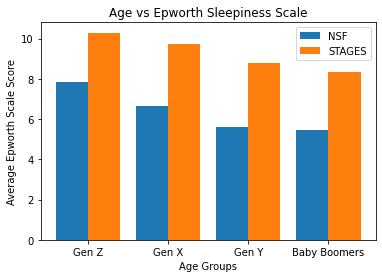

correlation coefficient: 0.02887


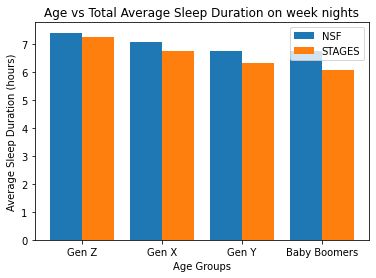

correlation coefficient: 0.02004


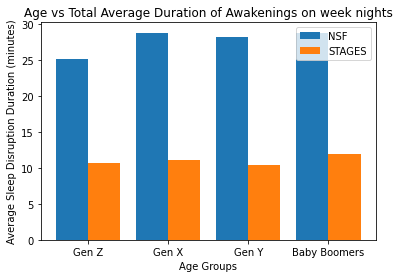

correlation coefficient: 0.5305


In [53]:
# categorize and graph by age groups, then print the correlation coefficient for each graph

bar_graph(nsf_ep_av, stages_ep_av, "Average Epworth Scale Score", "Age vs Epworth Sleepiness Scale")
find_correlation(nsf_ep_av, stages_ep_av)

bar_graph(nsf_sleep_av, stages_sleep_av, "Average Sleep Duration (hours)", 
          "Age vs Total Average Sleep Duration on week nights")
find_correlation(nsf_sleep_av, stages_sleep_av)

bar_graph(nsf_awake_av, stages_awake_av, "Average Sleep Disruption Duration (minutes)", 
          "Age vs Total Average Duration of Awakenings on week nights")
find_correlation(nsf_awake_av, stages_awake_av)

**Conclusions**

Based on the bar graph visualizations, the results indicate a clear pattern across the different age groups. For the Epworth Sleepiness bar graph, it is evident that for both datasets, as age increased, the Epworth Scale score decreased. Across time, the Epworth Scale score increased significantly for each generation. This supports the prediction that younger generations would have lower sleep quality, as evident in the higher Epworth scale scores. And over time, it would make sense that more people are likely dozing off in regular activities if environmental and external factors, such as technology, is more commonly disrupting sleep. 

For the second bar graph, it can be observed that there is a pattern across the bars. As age increased, the total average sleep duration decreased. Between the two datasets, sleep duration slightly decreased for each age group. This supports the prediction that with time, there are more ways that our sleep cycles are disrupted and therefore, result in getting shorter durations of sleep. However, it was unexpected that the older generations reported getting less sleep than the younger generations. This could convey that sleep may not be as necessary for older people than it is for younger people who are still growing phyiscally and psychologically. Or, it could indicate that external factors are impacting sleep quality more for older generations than younger generations.

For the third bar graph, the results illustrate an interesting pattern. Across generations, the average duration of sleep awakenings are similar. However, between the two datasets, more people in the 2011 NSF poll reported to have longer sleep awakenings. This could potentially indicate that the duration of sleep awakenings may not have changed between age groups and therefore, external factors may not depend on age. To address the increased sleep disruptions for the 2011 dataset, limited data values from the STAGES dataset may have affected the results, since with only a few responses to plot from, the data may not be representative of the generation it depicts. Another possibility is that certain lifestyles in the past may have disrupted sleep patterns more frequently than today, resulting in longer sleep awakenings.

The correlation coefficients roughly reflect the observations made between the bar plots. Despite weak positive correlations between the datasets for the first two graphs, it was still clear that there is a trend across age and time. For the third bar graph, the correlation was moderately positive, which indicates that the relationship between age and sleep awakenings across the two datasets is moderately strong. This means there was a noticable change or pattern in sleep awakenings over time for each of the age groups.

**Limitations**

It is important to note the limitations that the provided datasets have. The drastic difference in the number of respondants between the two datasets could reflect discrepancies because the weight of the number of respondants could affect the correlation. Having more data points indicate a more accurate correlation, while fewer data points could be prone to skewed results due to response bias (since people who likely do respond may have stronger views and thoughts on the topic) creating unrepresentative responses and therefore, lead to a bias correlation. 

In addition, the two datasets are obtained from different groups of people and at different years, which may further lead to inaccurate results as the demographics of the samples were not controlled.

The method of surveying the respondants may also bring in bias since the National Sleep Foundation conducted a poll through telecommunication, where nonresponse bias and wording bias can affect the responses. The STAGES utilized a digital questionnaire, where the same biases can influence the responses.

**Final Remarks**

Overall, the results of this project demonstrate both predicted and unpredicted findings. Sleepiness patterns and sleep duration did vary depending on age groups as well as time period. However, total awakenings was not as clearly affected by age, indicating that perhaps a variety of other factors--such as the rigor and exhaustion of everyday life or utilization of technology, can affect sleep patterns and may simply be applicable to everyone.

**References**

1. “Blue Light Has a Dark Side.” Harvard Health, 7 July 2020, https://www.health.harvard.edu/staying-healthy/blue-light-has-a-dark-side#:~:text=Harvard%20researchers%20and%20their%20colleagues,as%20much%20(3%20hours%20vs. 

2. Ramsey, David. “Will Blue Light from Electronic Devices Increase My Risk of Macular Degeneration and Blindness?” Harvard Health, 1 May 2019, https://www.health.harvard.edu/blog/will-blue-light-from-electronic-devices-increase-my-risk-of-macular-degeneration-and-blindness-2019040816365. 

3. Fossum IN;Nordnes LT;Storemark SS;Bjorvatn B;Pallesen S; “The Association between Use of Electronic Media in Bed before Going to Sleep and Insomnia Symptoms, Daytime Sleepiness, Morningness, and Chronotype.” Behavioral Sleep Medicine, U.S. National Library of Medicine, https://pubmed.ncbi.nlm.nih.gov/24156294/. 

4. Fuller, Caitlyn, et al. “Bedtime Use of Technology and Associated Sleep Problems in Children.” Global Pediatric Health, SAGE Publications, 27 Oct. 2017, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5669315/. 

5. Tapia, Ignacio. “Sleep and Technology: Incompatible for Adolescents.” Children's Hospital of Philadelphia, The Children's Hospital of Philadelphia, 23 Aug. 2016, https://www.chop.edu/news/sleep-and-technology-incompatible-adolescents#:~:text=A%20survey%20of%20more%20than,sleepiness%2C%20and%20worse%20academic%20performance.
6. “Plotting Multiple Bar Charts Using Matplotlib in Python.” GeeksforGeeks, 25 Feb. 2021, https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/. 